In [1]:
#!/usr/bin/env python
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

Extract relevant blocks for conditional distribution p(x2, x3 | x1, x4)

In [2]:
μₐ = array([[100,5]]).T
μᵦ = array([[70,8]]).T

In [3]:
Σₐₐ = array([	[64,12],
				[12,9]])

In [4]:
Σᵦᵦ = array([	[25,-4],
				[-4, 1]])

In [5]:
Σₐᵦ = array([	[15,-3],
				[ 2,-1]])

In [6]:
xₐ = array([[85,8]]).T
xᵦ = array([[66,8]]).T

Compute conditional mean and covariance for p(x2, x3 | x1, x4)

In [7]:
Σᵦᵦˉᣳ = np.linalg.inv(Σᵦᵦ)
μₐӏᵦ = μₐ + Σₐᵦ @ Σᵦᵦˉᣳ @ (xᵦ - μᵦ)
Σₐӏᵦ = Σₐₐ - Σₐᵦ @ Σᵦᵦˉᣳ @ Σₐᵦ.T

Create a grid for plotting

In [8]:
x2_vals = np.linspace(μₐӏᵦ[0,0] - 23, μₐӏᵦ[0,0] + 23, 50)
x3_vals = np.linspace(μₐӏᵦ[1,0] - 23, μₐӏᵦ[1,0] + 23, 50)
X2, X3 = np.meshgrid(x2_vals, x3_vals)
pos = np.dstack((X2, X3))

Compute the probability density function

In [9]:
rv = multivariate_normal(μₐӏᵦ.flatten(), Σₐӏᵦ)
Z = rv.pdf(pos)

Print conditional mean and covariance

In [10]:
print(μₐӏᵦ, Σₐӏᵦ)

[[98.66666667]
 [ 5.88888889]] [[54.          9.66666667]
 [ 9.66666667  7.55555556]]


3D Plot

In [11]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X2, X3, Z, cmap='viridis', alpha=0.7)

Plot grandmother's location

In [12]:
grandmother_pdf_value = rv.pdf(xᵦ.flatten())
ax.scatter(xₐ[0,0], xₐ[1,0], grandmother_pdf_value, color='red', s=100, label="Grandmother location")

In [13]:
ax.set_xlabel("Fasting Glucose Level (x2) [mg/dL]")
ax.set_ylabel("CRP Level (x3) [mg/L]")
ax.set_zlabel("Probability Density")
ax.set_title("Conditional Distribution p(x2, x3 | x1, x4)")
ax.legend()

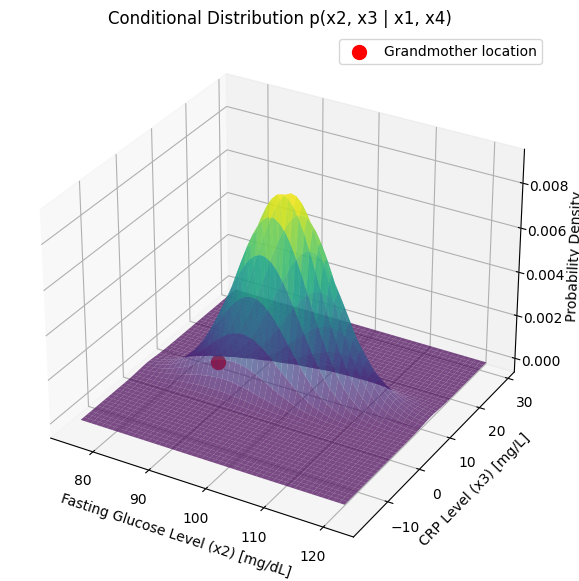

In [14]:
plt.show()